In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import load

from glob import glob
import pandas as pd
import os

In [2]:
stacking_strategies = [
    "igcngru_features",
    "idarkvec"]

stacking_strategies.sort()
with_nodes = "vanilla"
day = "20211221"

probs_cols = [
        'mirai',
        'unk_bruteforcer',
        'unk_spammer',
        'shadowserver',
        'driftnet',
        'internetcensus',
        'censys',
        'rapid7',
        'onyphe',
        'netsystems',
        'shodan',
        'unk_exploiter',
        'securitytrails',
        'intrinsec',
        'unknown'
    ]
probs_cols.sort()

In [3]:
model = load(f"stacking_data/{with_nodes}/{day}/idarkvec-igcngru_features/0/lr.joblib")

In [4]:
model.classes_

array(['censys', 'driftnet', 'internetcensus', 'intrinsec', 'mirai',
       'netsystems', 'onyphe', 'securitytrails', 'shadowserver', 'shodan',
       'unk_bruteforcer', 'unk_exploiter', 'unk_spammer'], dtype=object)

In [5]:
model.coef_.shape

(13, 30)

In [6]:
coeffs = []
for fold in np.arange(10):
    model = load(f"stacking_data/{with_nodes}/20211221/idarkvec-igcngru_features/{fold}/lr.joblib")
    coeffs.append(model.coef_)

coeffs = np.sum(coeffs, axis=0)
coeffs = coeffs / 10

In [7]:
xl = []
for s in stacking_strategies:
    for i, c in enumerate(probs_cols):
        xl.append(f"{s} / {c}")

if with_nodes == "vanilla":
    for i in np.arange(coeffs.shape[1] - len(xl)):
        xl.append(f"Node Feature: {i}")

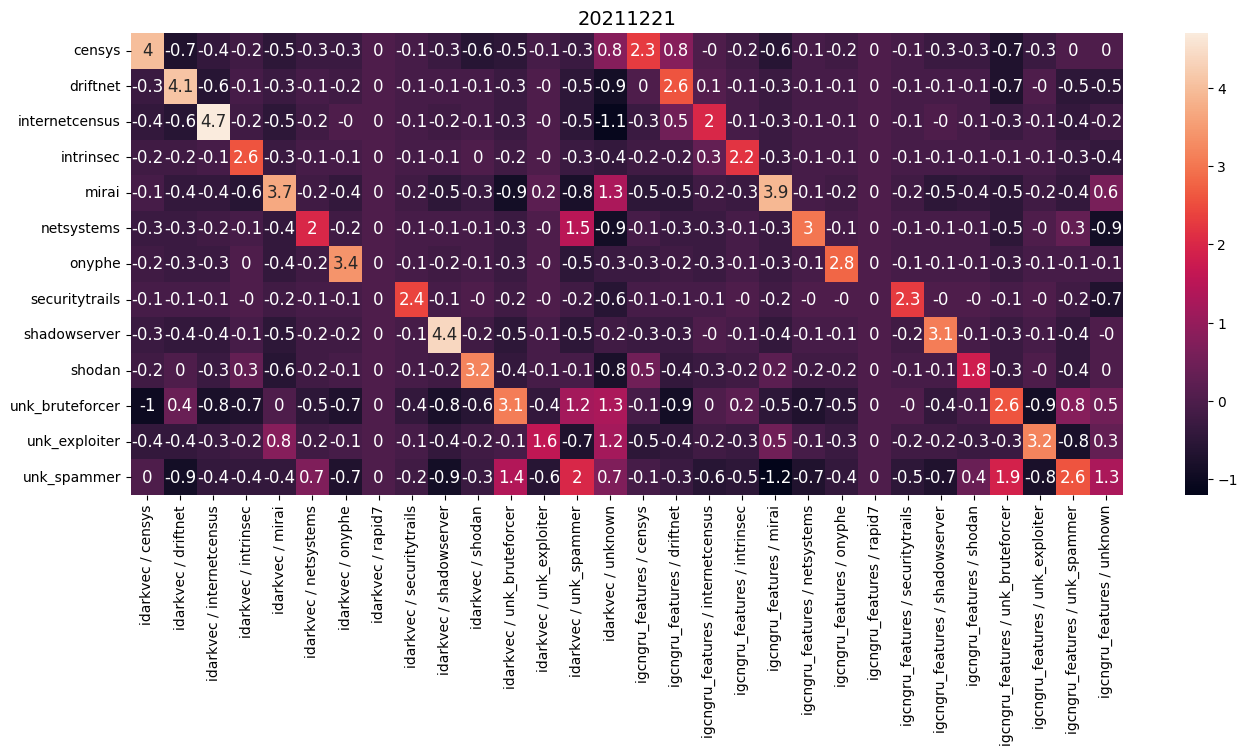

In [8]:
plt.figure(figsize=(16,6))
sns.heatmap(np.trunc(coeffs * 10) / 10, annot=True, annot_kws={"size": 12}, yticklabels=model.classes_, xticklabels=xl)
plt.title(day, fontsize=14)
plt.savefig("pdfs/charts/lr_coefs.pdf", bbox_inches="tight")